# Text classification - multiclass

Based on a single text column, we want to classify each document into a single class

Here we use CNN article dataset to classify each document into correct Category.

Our main feature is the Description column. We have split dataset into training and validations sets in `prepare-dataset.ipynb` notebook (you can also run `prepare_dataset.py`)

In [1]:
# essential modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# download tokenizers and stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/wflis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wflis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA

In [2]:
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("data/training_set.csv")
df.head(3)

,Description,Category
0,"Two teenage boys have been charged after ""alle...",news
1,"Danish cartoonist Kurt Westergaard, whose depi...",news
2,Whether it was his bleach blonde hair or his d...,sport


In [3]:
df['Category'].value_counts()

sport            1751
news             1298
business           74
politics           52
entertainment      43
health             42
Name: Category, dtype: int64

In [4]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates()

In [5]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
# New dataframe
df.head()

,Description,Category,category_id
0,"Two teenage boys have been charged after ""alle...",news,0
1,"Danish cartoonist Kurt Westergaard, whose depi...",news,0
2,Whether it was his bleach blonde hair or his d...,sport,1
3,A majority of Britons are not satisfied with t...,news,0
4,Police in the United Kingdom uncovered a crypt...,news,0


Text(0.5, 0, 'Number of ocurrences')

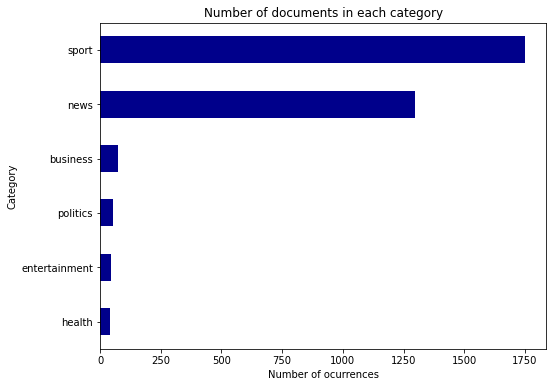

In [6]:
fig = plt.figure(figsize=(8,6))
df.groupby('Category')['Description'].count().sort_values().plot.barh(
    ylim = 0, 
    color = 'darkblue', 
    title = 'Number of documents in each category'
    )
plt.xlabel('Number of ocurrences', fontsize = 10)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df['Description']).toarray()
labels = df.category_id
print("Each of the %d documents is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 3260 documents is represented by 2808 features (TF-IDF score of unigrams and bigrams)


In [8]:
from sklearn.feature_selection import chi2

# Finding the three most correlated terms with each of the documents
N = 3
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("==> %s:" %(Category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


==> business:
  * Most Correlated Unigrams are: ukraine, inflation, prices
  * Most Correlated Bigrams are: years old, russia invasion, invasion ukraine
==> entertainment:
  * Most Correlated Unigrams are: streaming, movies, movie
  * Most Correlated Bigrams are: 20 years, died saturday, earlier week


/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


==> health:
  * Most Correlated Unigrams are: kept, cancer, abortion
  * Most Correlated Bigrams are: time years, president donald, new year
==> news:
  * Most Correlated Unigrams are: minister, uk, league
  * Most Correlated Bigrams are: read cnn, fast facts, prime minister
==> politics:
  * Most Correlated Unigrams are: voting, reelection, democrats
  * Most Correlated Bigrams are: donald trump, supreme court, president donald
==> sport:
  * Most Correlated Unigrams are: team, olympic, league
  * Most Correlated Bigrams are: fast facts, premier league, prime minister


/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Exploring multi-classification models

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

X = df['Description'] # Collection of documents
y = df['Category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 42)                 

In [10]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42, n_jobs=-1),
]    

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [11]:
from sklearn.model_selection import cross_val_score

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [12]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.874847,0.011660
LogisticRegression,0.869939,0.009479
MultinomialNB,0.871472,0.009845
RandomForestClassifier,0.629755,0.010548


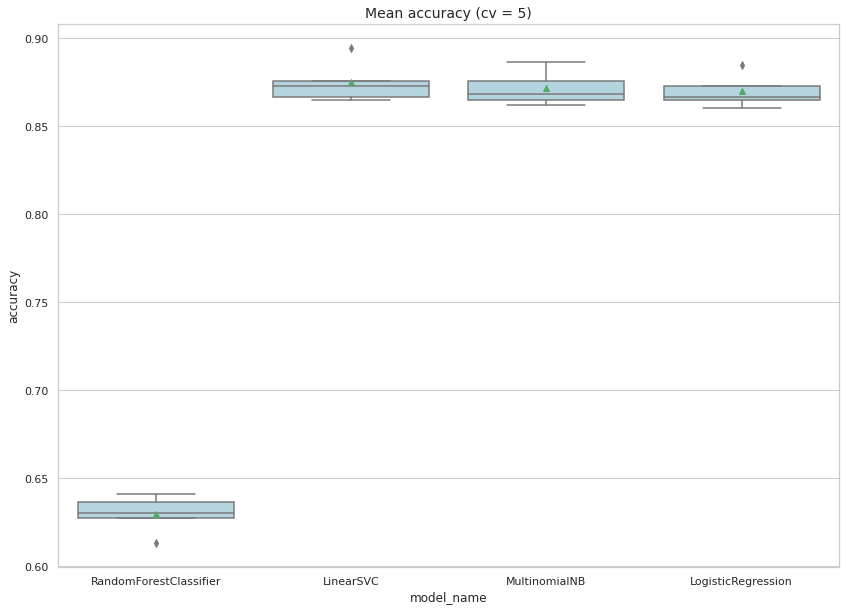

In [13]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(14,10))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("Mean accuracy (cv = 5)", size=14);

# Evaluation on test set

In [26]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df['Category'].unique()))

CLASSIFICATIION METRICS
               precision    recall  f1-score   support

         news       0.84      0.94      0.88       308
        sport       0.93      0.93      0.93       454
       health       0.00      0.00      0.00        11
entertainment       1.00      0.29      0.44         7
     business       1.00      0.18      0.30        17
     politics       0.73      0.44      0.55        18

     accuracy                           0.89       815
    macro avg       0.75      0.46      0.52       815
 weighted avg       0.88      0.89      0.88       815



/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wflis/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Text(0.5, 1.0, 'CONFUSION MATRIX - LinearSVC')

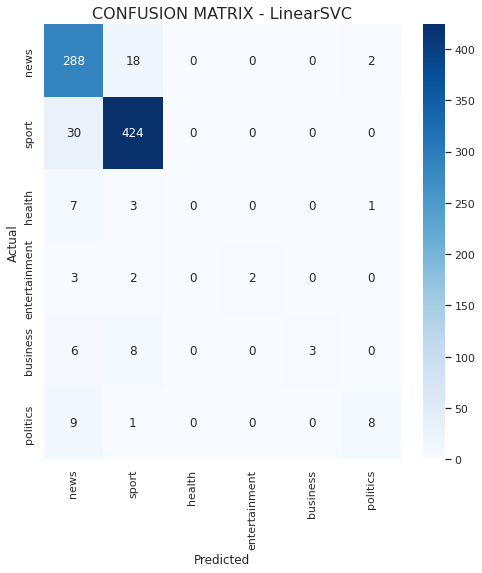

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC", size=16)

# Problem: We have too few samples in categories other than first two

First possible resolution: undersampling news/sports so the they have fewer obervations, along the lines of business and politics. Sadly, that way we will discard a lot of data.

In [17]:
from collections import Counter

# label distribution before
counter = Counter(labels)
counter

Counter({0: 1298, 1: 1751, 2: 42, 3: 43, 4: 74, 5: 52})

In [18]:
import imblearn

sm = imblearn.over_sampling.SMOTE(random_state=42)
X, y = sm.fit_resample(features, labels)

# label distribution after
counter = Counter(y)
counter

Counter({0: 1751, 1: 1751, 2: 1751, 3: 1751, 4: 1751, 5: 1751})

Let's retrain model and see classification report again

In [21]:
model = LinearSVC()
model.fit(X, y)
y_pred = model.predict(X)
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y, y_pred, 
                                    target_names= df['Category'].unique()))

CLASSIFICATIION METRICS
               precision    recall  f1-score   support

         news       1.00      1.00      1.00      1751
        sport       1.00      1.00      1.00      1751
       health       1.00      1.00      1.00      1751
entertainment       1.00      1.00      1.00      1751
     business       1.00      1.00      1.00      1751
     politics       1.00      1.00      1.00      1751

     accuracy                           1.00     10506
    macro avg       1.00      1.00      1.00     10506
 weighted avg       1.00      1.00      1.00     10506



Text(0.5, 1.0, 'CONFUSION MATRIX - LinearSVC')

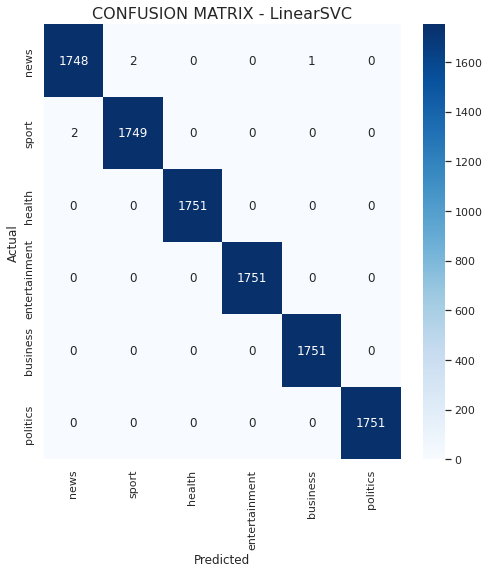

In [22]:
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC", size=16)

We may have actually overfitted our model - let's check with test set

In [24]:
df = pd.read_csv("data/validation_set.csv")

# encode labels
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates()
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

# encode features
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# create prediction data
features = tfidf.fit_transform(df['Description']).toarray()
labels = df.category_id

In [30]:
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,649,650,651,652,653,654,655,656,657,658
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.613595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
812,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
813,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
814,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279945


In [25]:
predicted_labels = model.predict(features)
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(labels, predicted_labels, target_names= df['Category'].unique()))

ValueError: X has 659 features, but LinearSVC is expecting 2808 features as input.